d:\software\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\software\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\software\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\software\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\software\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to es

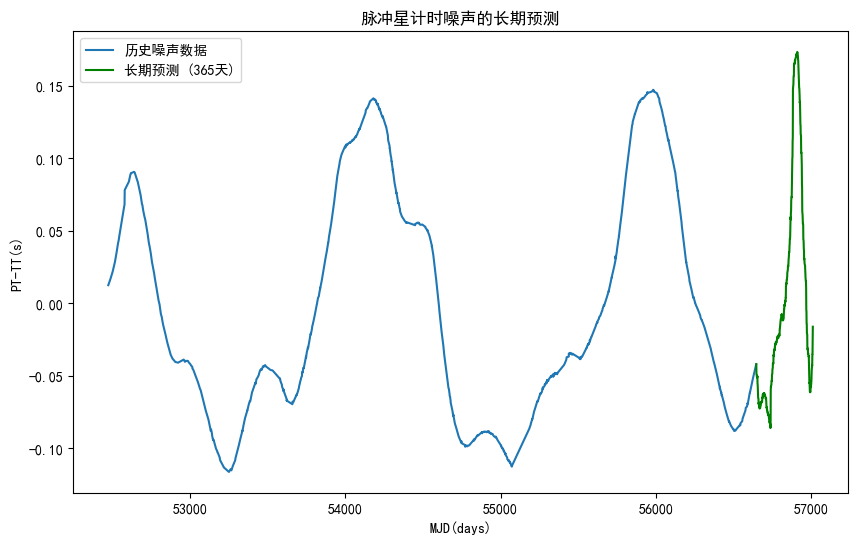

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
# 设置matplotlib使用支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 加载数据
data = pd.read_excel('Attachment 1.xlsx')
data.columns = ['MJD(days)', 'PT-TT(s)']

# 设置MJD(days)为索引
data.set_index('MJD(days)', inplace=True)

# 清理数据，将非数值转换为NaN并删除
data['PT-TT(s)'] = pd.to_numeric(data['PT-TT(s)'], errors='coerce')
data = data.dropna()

# 定义SARIMA模型参数 ( P, D, Q, s)
# (p, d, q) 是非季节性部分，(P, D, Q, s) 是季节性部分，s 代表季节性周期
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 365  # 假设一年为一个季节性周期

# 拟合SARIMA模型
model_sarima = SARIMAX(data['PT-TT(s)'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_sarima_fit = model_sarima.fit()

# 长期预测：预测未来一年（假设数据为每日记录，所以预测365天）
n_long_term = 365
forecast_long_term = model_sarima_fit.forecast(steps=n_long_term)

# 创建MJD的预测索引，假设MJD按固定间隔递增
forecast_index_long = data.index[-1] + np.arange(1, n_long_term + 1)

# 将预测结果保存到DataFrame，并输出为CSV文件
forecast_long_df = pd.DataFrame({'MJD(days)': forecast_index_long, 'Predicted PT-TT(s)': forecast_long_term})
forecast_long_df.to_csv('长期预测结果.csv', index=False, encoding='utf-8-sig')

# 绘制历史数据和长期预测结果
plt.figure(figsize=(10, 6))
plt.plot(data['PT-TT(s)'], label='历史噪声数据')
plt.plot(forecast_index_long, forecast_long_term, label='长期预测 (365天)', color='green')
plt.xlabel('MJD(days)')
plt.ylabel('PT-TT(s)')
plt.title('脉冲星计时噪声的长期预测')
plt.legend()
plt.show()
